### This Notebook Showcases all of the Visualizations for our Dashboard

In [39]:
from reddit_scraper import RedditScraper
from dash import dcc
import plotly.express as px
import matplotlib.pyplot as plt
from models import Sentiment_Scorer
# from models import Sentiment_Scorer
import seaborn as sns
import pandas as pd
import numpy as np

In [40]:
scraper = RedditScraper()

In [41]:
df = scraper.scrape_subreddit_submissions("UIUC")
df.head()

,id,created_utc,title,text,author,score,upvote_ratio,num_comments,url,date
0,lypvic,2021-03-06 00:28:58,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,266,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...,2021-03-06
1,1859gzi,2023-11-27 18:13:06,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,25,1.00,2,https://www.reddit.com/r/UIUC/comments/1859gzi...,2023-11-27
2,18cans3,2023-12-06 18:33:07,GEO is wilding,1. It’s absurd that they think that their stat...,dtheisei8,122,0.74,59,https://i.redd.it/ricppeakxp4c1.jpeg,2023-12-06
3,18cbsno,2023-12-06 19:21:40,CALL TO ACTION - UI ICE ARENA,They can afford to blow money on a losing foot...,CuPride,87,0.91,44,https://i.redd.it/mz3n7pi86q4c1.jpg,2023-12-06
4,18ceac8,2023-12-06 21:08:22,We getting a college of computer science?,I heard we might be getting a separate college...,bill_jz,16,0.76,12,https://www.reddit.com/r/UIUC/comments/18ceac8...,2023-12-06


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            300 non-null    object        
 1   created_utc   300 non-null    datetime64[ns]
 2   title         300 non-null    object        
 3   text          300 non-null    object        
 4   author        299 non-null    object        
 5   score         300 non-null    int64         
 6   upvote_ratio  300 non-null    float64       
 7   num_comments  300 non-null    int64         
 8   url           300 non-null    object        
 9   date          300 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 23.6+ KB


### Applying Sentiment Analysis

In [43]:
model = Sentiment_Scorer(df, 'K Nearest Neighbors')
print("Selected Model")
df_polarity = model.label_dataset()
df_polarity.head()

Selected Model


c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning:

Trying to unpickle estimator KNeighborsClassifier from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning:

Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning:

Trying to unpickle estim

,id,created_utc,title,text,author,score,upvote_ratio,num_comments,url,date,sentiment
0,lypvic,2021-03-06 00:28:58,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,266,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...,2021-03-06,Positive
1,1859gzi,2023-11-27 18:13:06,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,25,1.00,2,https://www.reddit.com/r/UIUC/comments/1859gzi...,2023-11-27,Positive
2,18cans3,2023-12-06 18:33:07,GEO is wilding,1. It’s absurd that they think that their stat...,dtheisei8,122,0.74,59,https://i.redd.it/ricppeakxp4c1.jpeg,2023-12-06,Positive
3,18cbsno,2023-12-06 19:21:40,CALL TO ACTION - UI ICE ARENA,They can afford to blow money on a losing foot...,CuPride,87,0.91,44,https://i.redd.it/mz3n7pi86q4c1.jpg,2023-12-06,Positive
4,18ceac8,2023-12-06 21:08:22,We getting a college of computer science?,I heard we might be getting a separate college...,bill_jz,16,0.76,12,https://www.reddit.com/r/UIUC/comments/18ceac8...,2023-12-06,Positive


### Visualization 1 - Word Cloud 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


If make new post see
<class 'str'>


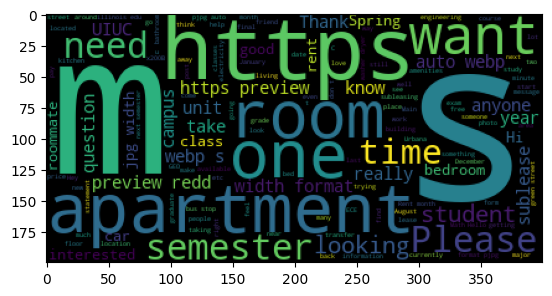

In [44]:
from wordcloud import WordCloud
from PIL import Image


from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def generate_wordcloud(df_):
    vocab = df_.dropna()['text'].str.replace(r'\?|\.|\'', ' ')
    vocab = ' '.join(vocab)
    vocab = ' '.join([i for i in vocab.split(' ') if i not in stopwords.words('english')])
    print(vocab[:20])
    wc = WordCloud().generate(vocab)
    print(type(vocab))
    plt.imshow(wc)
    return vocab, wc

vocab, wordcloud = generate_wordcloud(df_polarity[df_polarity['sentiment'] == 'Positive'])

### One for Positive Sentiment

If make new post see
<class 'str'>


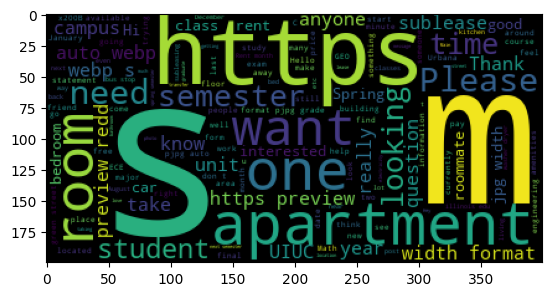

In [45]:
vocab, wordcloud = generate_wordcloud(df_polarity[df_polarity['sentiment'] == 'Positive'])

### One for Negative Sentiment

  Hi guys,
Any hacks
<class 'str'>


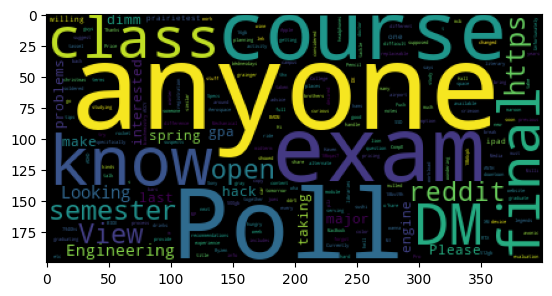

In [46]:
vocab, wordcloud = generate_wordcloud(df_polarity[df_polarity['sentiment'] == 'Negative'])

### Visualization 2, Sentiment Counts Over Time (will be a line graph or Stacked bar chart depending on how sparse the data is)

- Group by Week, Plot Sentiment

In [47]:
df_polarity['date'] = pd.to_datetime(df_polarity['created_utc']).dt.date

#### Add Percentages 
- Track Percentages and Proportions Over Time
- Create Another Graph Side by Side or Add Hover Over ToolTip

In [48]:
df_polarity.groupby('date')['sentiment'].value_counts().reset_index()

,date,sentiment,count
0,2021-03-06,Positive,1
1,2023-11-27,Positive,1
2,2023-11-29,Positive,1
3,2023-11-30,Positive,7
4,2023-11-30,Negative,4
5,2023-11-30,Neutral,2
6,2023-12-01,Positive,35
7,2023-12-01,Negative,7
8,2023-12-01,Neutral,1
9,2023-12-02,Positive,19


<Axes: xlabel='date'>

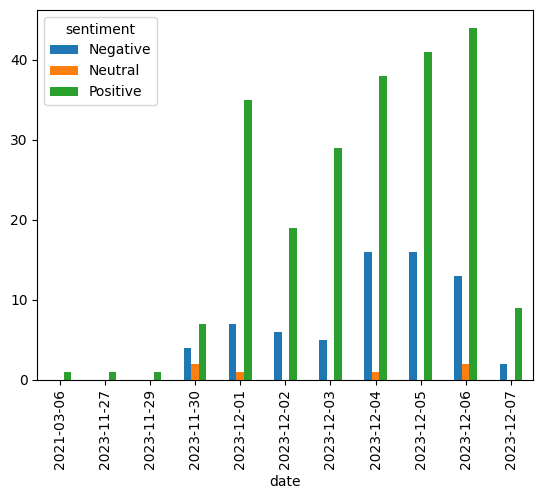

In [49]:
df_polarity.groupby('date')['sentiment'].value_counts().unstack().fillna(0).plot(kind='bar')

In [50]:
# !pip install --upgrade nbformat
# !pip install ipykernel

px.bar(df_polarity.groupby('date')['sentiment'].value_counts().reset_index(), x="date", y="count", color="sentiment")

### Visualization 3, Pie Chart

In [51]:
df_polarity['sentiment'].value_counts().reset_index()

,sentiment,count
0,Positive,225
1,Negative,69
2,Neutral,6


In [52]:
px.pie(df_polarity['sentiment'].value_counts().reset_index(), values='count', names='sentiment')

<Axes: xlabel='sentiment'>

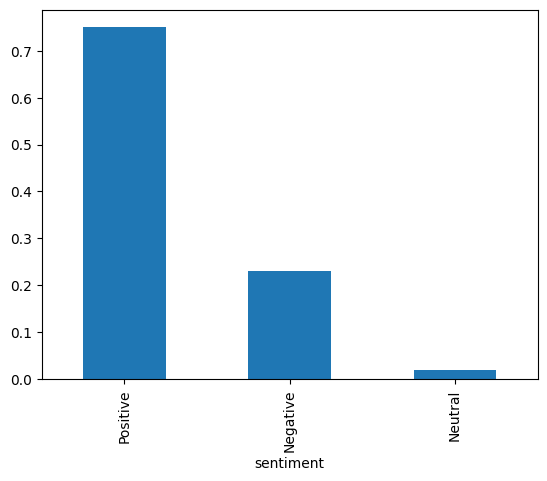

In [53]:
(df_polarity['sentiment'].value_counts() / len(df)).plot(kind='bar')

### Visualization 4 - Sentiment Label vs Scores and Ratio

In [54]:
df_polarity[['sentiment', 'upvote_ratio', 'score']]

,sentiment,upvote_ratio,score
0,Positive,0.99,266
1,Positive,1.00,25
2,Positive,0.74,122
3,Positive,0.91,87
4,Positive,0.76,16
...,...,...,...
295,Positive,1.00,1
296,Positive,1.00,3
297,Positive,0.73,15
298,Positive,1.00,2


In [55]:
px.strip(df_polarity, x='sentiment', y='score')

In [56]:
px.strip(df_polarity, x='sentiment', y='upvote_ratio')

<Axes: xlabel='sentiment', ylabel='score'>

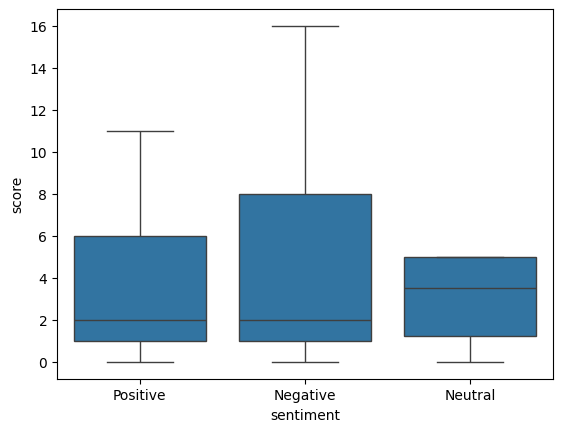

In [57]:
sns.boxplot(df_polarity, x='sentiment', y='score', showfliers=False)

<Axes: xlabel='sentiment', ylabel='upvote_ratio'>

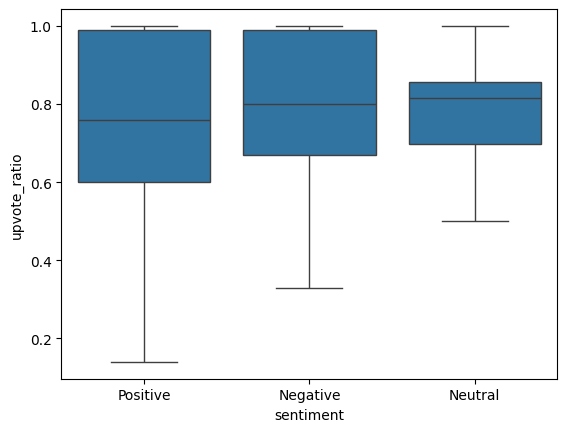

In [58]:
sns.boxplot(df_polarity, x='sentiment', y='upvote_ratio', showfliers=False)

### Visualization 5 - Most Common Words for Each Sentiment

In [59]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')
import re
from nltk.probability import FreqDist
import string

def preprocess_text(df_):
    punctuation = string.punctuation + '’'
    df_['text'] = df_['text'].apply(lambda x:  x.translate(str.maketrans('', '', punctuation)))
    df_['text'] = df_['text'].apply(lambda x:  x.lower())
    df_['text'] = df_['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    df_['text'] = df_['text'].apply(lambda x: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', x))
    df_['text'] = df_['text'].apply(lambda x: re.sub("(@[A-Za-z0-9_]+)","", x))
    df_['tokens'] = df_['text'].apply(lambda x: word_tokenize(x))

df_copy = df_polarity.copy()
preprocess_text(df_copy)
df_copy['text'].iloc[:10]

0    make new post dont see appear new couple minut...
1    added new flair sublease posts titled sublease...
2    1 absurd think statement regarding ceasefire a...
3    afford blow money losing football team cant af...
4    heard might getting separate college computer ...
5    hello im looking someone could drop visits two...
6    hey im currently eses major las im thinking wa...
7    birthday tomorrow miss home havent seen sister...
8    hi cut hair side looking try different styles ...
9    title really need retake particular class also...
Name: text, dtype: object

In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            300 non-null    object        
 1   created_utc   300 non-null    datetime64[ns]
 2   title         300 non-null    object        
 3   text          300 non-null    object        
 4   author        299 non-null    object        
 5   score         300 non-null    int64         
 6   upvote_ratio  300 non-null    float64       
 7   num_comments  300 non-null    int64         
 8   url           300 non-null    object        
 9   date          300 non-null    object        
 10  sentiment     300 non-null    object        
 11  tokens        300 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 28.2+ KB


In [61]:
df_copy.head()

,id,created_utc,title,text,author,score,upvote_ratio,num_comments,url,date,sentiment,tokens
0,lypvic,2021-03-06 00:28:58,Reminder - the spam filter is a little too agg...,make new post dont see appear new couple minut...,Shifted-Paradigm,266,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...,2021-03-06,Positive,"[make, new, post, dont, see, appear, new, coup..."
1,1859gzi,2023-11-27 18:13:06,"New 'Sublease' Post Flair, now required for al...",added new flair sublease posts titled sublease...,love4boats,25,1.00,2,https://www.reddit.com/r/UIUC/comments/1859gzi...,2023-11-27,Positive,"[added, new, flair, sublease, posts, titled, s..."
2,18cans3,2023-12-06 18:33:07,GEO is wilding,1 absurd think statement regarding ceasefire a...,dtheisei8,122,0.74,59,https://i.redd.it/ricppeakxp4c1.jpeg,2023-12-06,Positive,"[1, absurd, think, statement, regarding, cease..."
3,18cbsno,2023-12-06 19:21:40,CALL TO ACTION - UI ICE ARENA,afford blow money losing football team cant af...,CuPride,87,0.91,44,https://i.redd.it/mz3n7pi86q4c1.jpg,2023-12-06,Positive,"[afford, blow, money, losing, football, team, ..."
4,18ceac8,2023-12-06 21:08:22,We getting a college of computer science?,heard might getting separate college computer ...,bill_jz,16,0.76,12,https://www.reddit.com/r/UIUC/comments/18ceac8...,2023-12-06,Positive,"[heard, might, getting, separate, college, com..."


In [62]:
df_copy['sentiment'].value_counts()

sentiment
Positive    225
Negative     69
Neutral       6
Name: count, dtype: int64

In [63]:
tokens_positive = df_copy[df_copy['sentiment'] == 'Positive']['tokens'].dropna().reset_index(drop=True)
tokens_negative = df_copy[df_copy['sentiment'] == 'Negative']['tokens'].dropna().reset_index(drop=True)
tokens_neutral = df_copy[df_copy['sentiment'] == 'Neutral']['tokens'].dropna().reset_index(drop=True)
tokens_positive

0      [make, new, post, dont, see, appear, new, coup...
1      [added, new, flair, sublease, posts, titled, s...
2      [1, absurd, think, statement, regarding, cease...
3      [afford, blow, money, losing, football, team, ...
4      [heard, might, getting, separate, college, com...
                             ...                        
220    [hello, everyone, roommate, withdraw, year, su...
221    [available, january, 2024, august, 2nd, 2024, ...
222    [tket, enables, gatelevel, quantum, computatio...
223    [im, single, female, moved, area, work, opted,...
224    [x200b, httpspreviewreddity2mt4xdzj54c1pngwidt...
Name: tokens, Length: 225, dtype: object

In [64]:
fdist = FreqDist(np.concatenate(tokens_negative))
fdist

FreqDist({'anyone': 10, 'class': 4, 'final': 4, 'dm': 4, 'exam': 4, 'semester': 3, 'know': 3, 'view': 3, '1': 3, 'looking': 3, ...})

In [65]:
df_freq_pos = pd.DataFrame(list(fdist.items()), columns=['Word', 'Count']).sort_values(by='Count', ascending=False).head(10)

In [66]:
px.bar(df_freq_pos, x='Word', y='Count')

<Axes: xlabel='Word'>

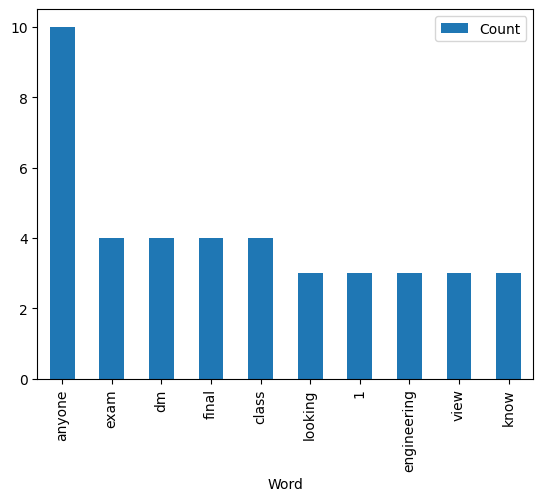

In [67]:
fdist = FreqDist(np.concatenate(tokens_negative))
fdist

pd.DataFrame(list(fdist.items()), columns=['Word', 'Count']).sort_values(by='Count', ascending=False).head(10).plot(kind='bar', x='Word', y='Count')

<Axes: xlabel='Word'>

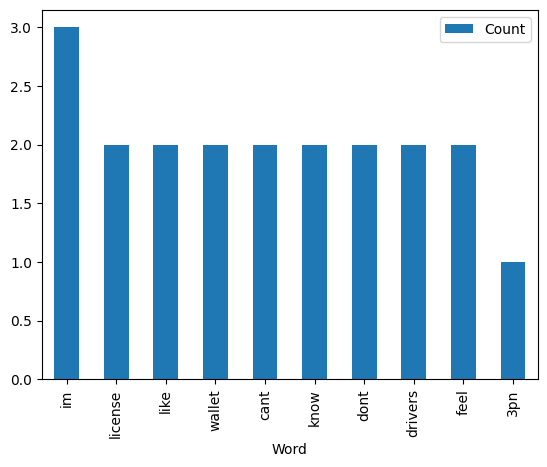

In [68]:
fdist = FreqDist(np.concatenate(tokens_neutral))
fdist
pd.DataFrame(list(fdist.items()), columns=['Word', 'Count']).sort_values(by='Count', ascending=False).head(10).plot(kind='bar', x='Word', y='Count')

<Axes: xlabel='Word'>

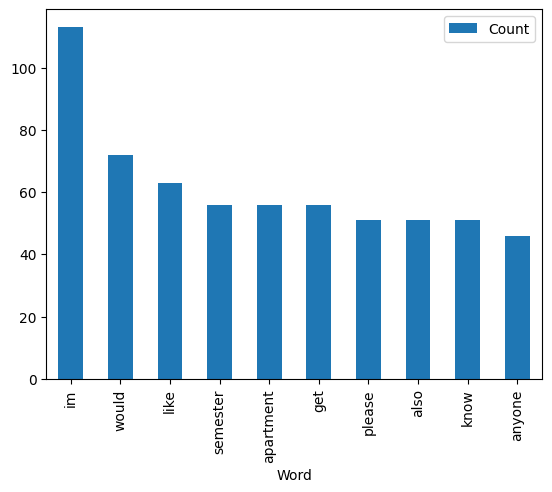

In [69]:
fdist = FreqDist(np.concatenate(tokens_positive))
fdist
pd.DataFrame(list(fdist.items()), columns=['Word', 'Count']).sort_values(by='Count', ascending=False).head(10).plot(kind='bar', x='Word', y='Count')

In [70]:
df_polarity['text'].apply(lambda x: model.clean_text(x))

0      make new post dont see appear new couple minut...
1      added new flair sublease post titled sublease ...
2      absurd think statement regarding ceasefire act...
3      afford blow money losing football team cant af...
4      heard might getting separate college computer ...
                             ...                        
295    available january august nd rent waterelectric...
296    tket enables gatelevel quantum computation man...
297    im single female moved area work opted move do...
298    xbim subletting onebedroom unit quiet beautifu...
299                         willing switch pm section pm
Name: text, Length: 300, dtype: object